In [4]:
import numpy as np
from matplotlib import pyplot as plt
# svm stuff
from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.datasets import *

In [16]:
X,y = load_iris(return_X_y=True)
X = X[:,:2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
X_train[:5], y_train[:5]

(array([[6. , 3.4],
        [4.8, 3.1],
        [5.8, 2.7],
        [5.6, 2.7],
        [5.6, 2.9]]),
 array([1, 0, 2, 1, 1]))

In [47]:
models = (
    svm.SVC(kernel="linear", C=1.0),
    svm.SVC(kernel="rbf", gamma=0.7, C=1.0),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=1.0),
)

models = ( clf.fit(X_train, y_train) for clf in models )

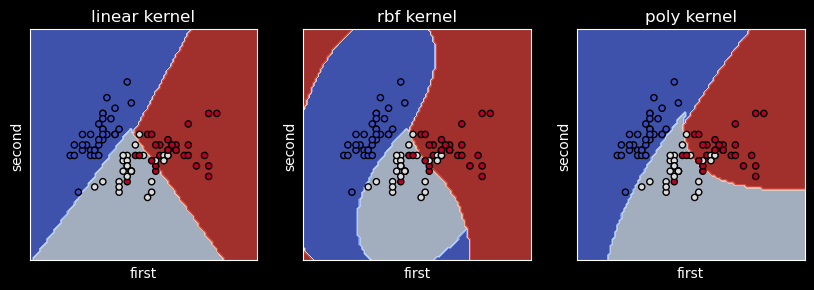

In [48]:
titles = ("linear kernel", "rbf kernel", "poly kernel")
fig, sub = plt.subplots(1, 3, figsize=(10,3))

X0, X1= X_train[:, 0], X_train[:, 1]

def plot(models, titles, sub):
    for clf, title, ax in zip(models, titles, sub):
        DecisionBoundaryDisplay.from_estimator(
            clf,
            X,
            response_method="predict",
            cmap=plt.cm.coolwarm,
            alpha=0.8,
            ax=ax,
            xlabel="first",
            ylabel="second",
        )
        ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='black')
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)

plot(models, titles, sub)

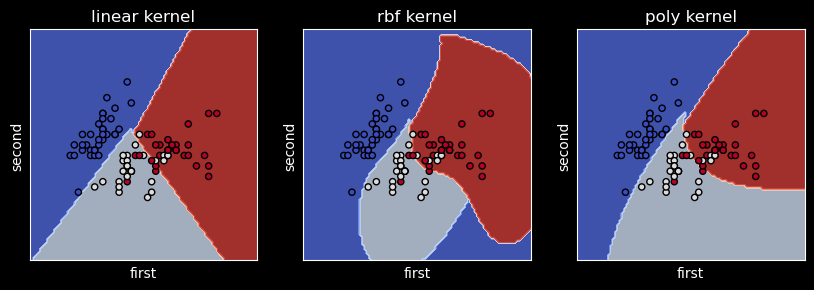

In [49]:
# cros validation
from sklearn.model_selection._search import GridSearchCV

models = [
    svm.SVC(kernel="linear", C=1.0),
    svm.SVC(kernel="rbf", gamma=0.7, C=1.0),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=1.0),
]

params = {'kernel':('linear', 'rbf', 'poly'), 'C':[1, 10]}
cross = ( GridSearchCV(clf, params) for clf in models )

Cs = []
for clf in cross:
    clf.fit(X_train, y_train)
    Cs += [clf.best_params_['C']]

models[0] = svm.SVC(kernel="linear", C=Cs[0])
models[1] = svm.SVC(kernel="rbf", gamma=0.7, C=Cs[1])
models[2] = svm.SVC(kernel="poly", degree=3, gamma="auto", C=Cs[2])

models = ( clf.fit(X_train, y_train) for clf in models )

fig, sub = plt.subplots(1, 3, figsize=(10,3))
titles = ("linear kernel", "rbf kernel", "poly kernel")

plot(models, titles, sub)



<h1>SVR</h1>

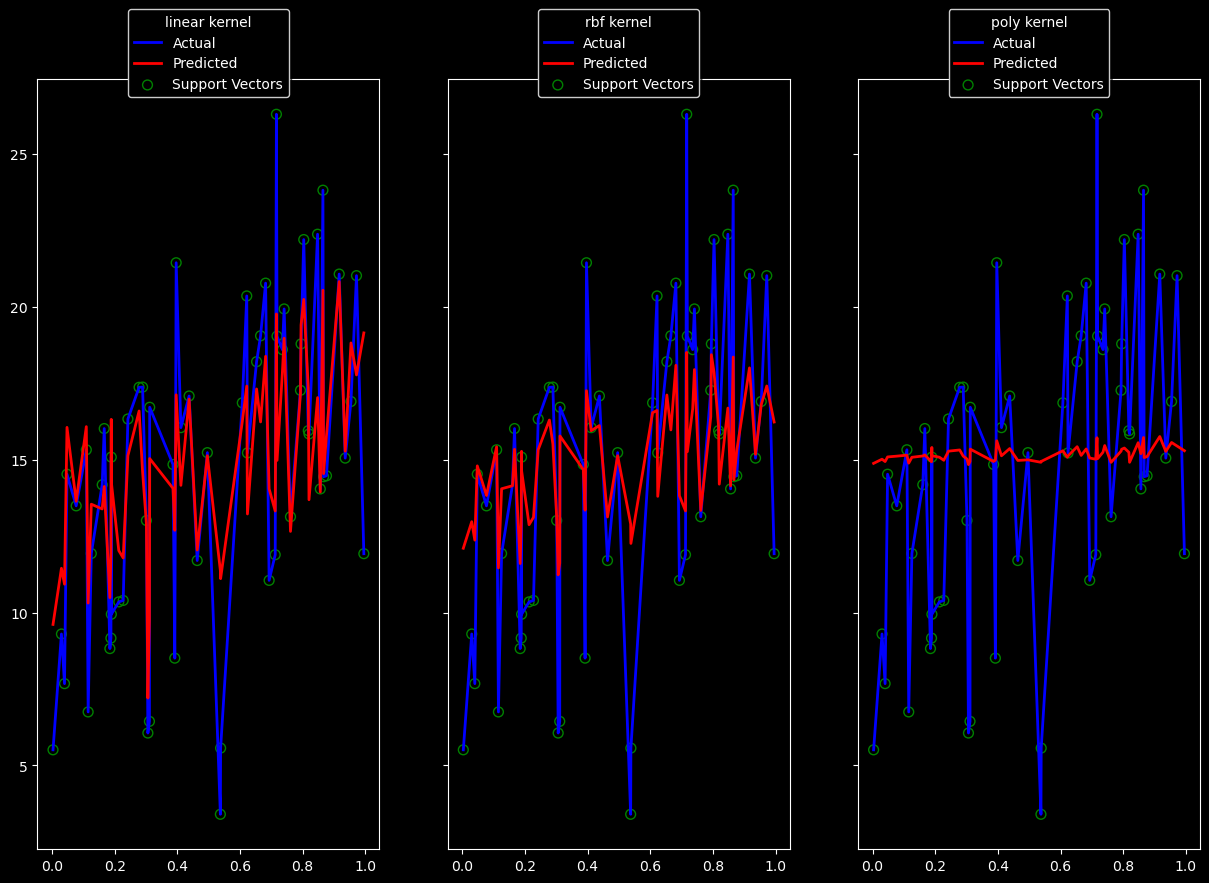

In [98]:
# Generate synthetic data
X, y = make_friedman1(n_samples=100, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Define the models with different kernels
models = [
    svm.SVR(kernel="linear", C=1.0),
    svm.SVR(kernel="rbf", gamma=0.7, C=1.0),
    svm.SVR(kernel="poly", degree=3, gamma="auto", C=1.0),
]

# Fit the models
models = [clf.fit(X_train, y_train) for clf in models]

titles = ("linear kernel", "rbf kernel", "poly kernel")
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)

for model,title,ax in zip(models,titles,axes):
    sorted_indices = np.argsort(X_train[:, 0])
    X_train_sorted = X_train[sorted_indices]
    y_train_sorted = y_train[sorted_indices]
    y_pred_sorted = model.predict(X_train_sorted)


    ax.plot(
        X_train_sorted[:, 0],
        y_train_sorted,
        color="b",
        label="Actual",
        lw=2,
    )

    ax.plot(
        X_train_sorted[:, 0],
        y_pred_sorted,
        color="r",
        label="Predicted",
        lw=2,
    )

    # Scatter plot the support vectors
    support_vectors = model.support_
    ax.scatter(
        X_train[support_vectors][:, 0],
        y_train[support_vectors],
        facecolor='none',
        edgecolor="green",
        s=50,
        label="Support Vectors",
    )


    ax.legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
        title=title,
    )